In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales = pd.read_csv('advertising.csv')

In [3]:
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
sales.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
sales.shape

(200, 4)

In [6]:
sales.size

800

In [7]:
sales.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# data does not have any missing values

# Find out the media which is best for advertising, that gives more sales

# 2. checking for duplicates


In [8]:
sales.duplicated().any()

False

# 3. Checking outliers
There are not extreme values present in dataset

In [9]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
sales.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


# EDA

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


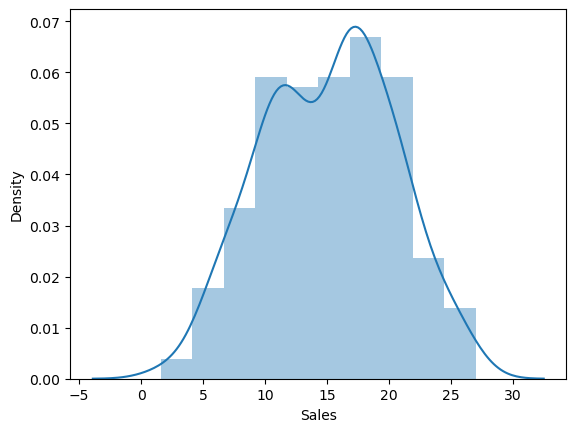

In [12]:
sns.distplot(sales['Sales']);

It is normally distributed

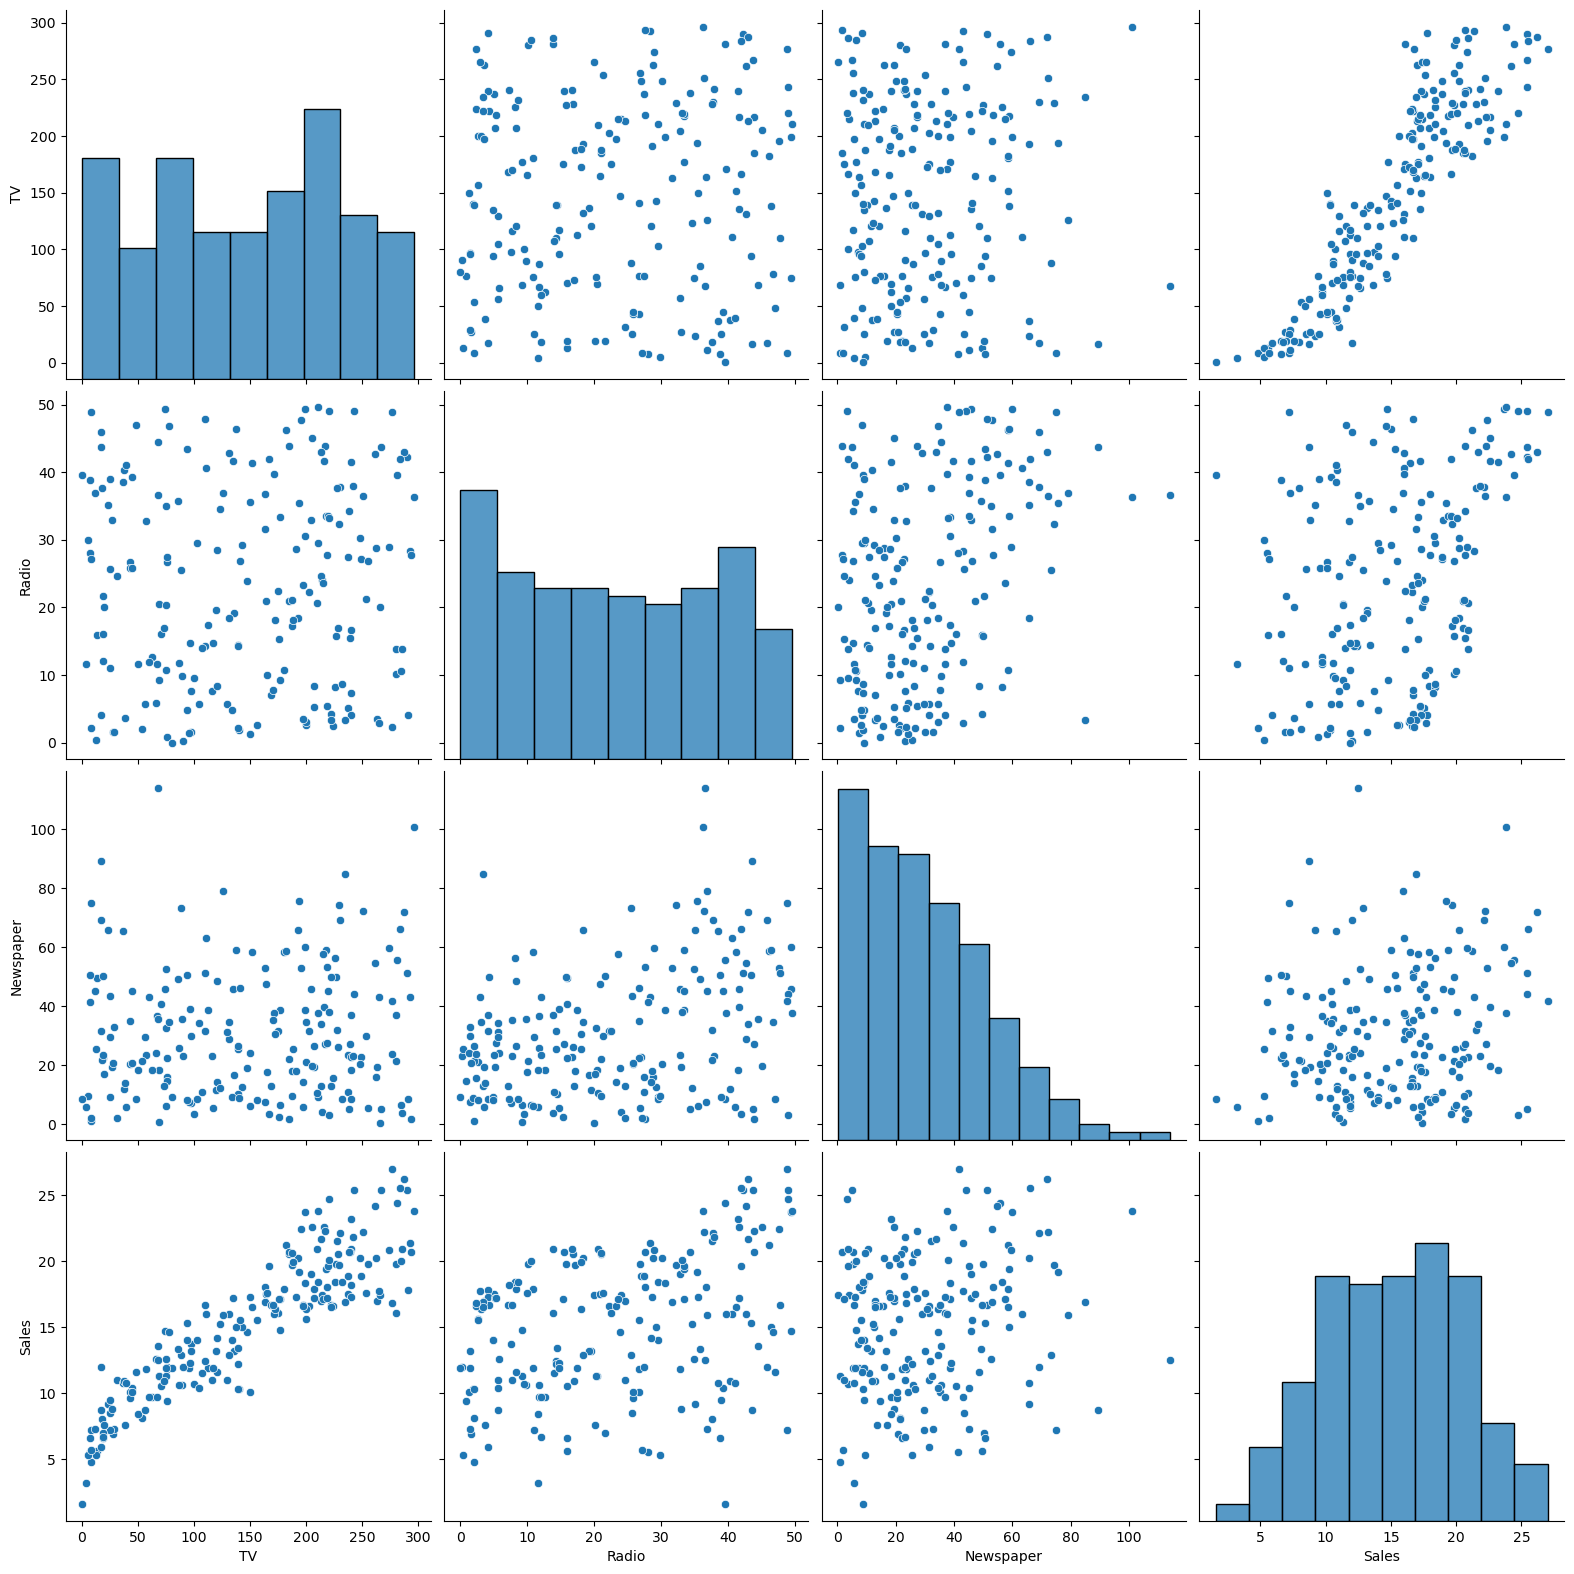

In [13]:
sns.pairplot(sales,height = 4,aspect=1);

1 parameter should be linear to the other


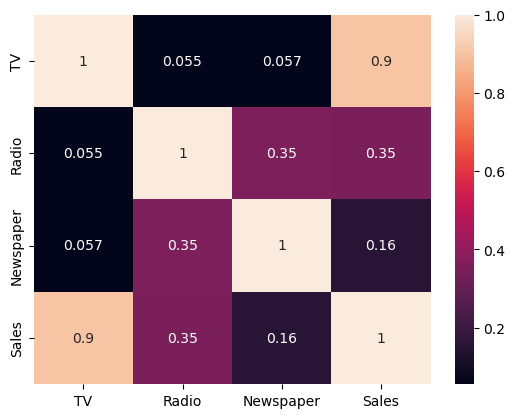

In [14]:
sns.heatmap(sales.corr(),annot = True);

Conclusion: TV seems to be most correlated with sales as 0.9 is very close to 1

# Model Building

TV will be X data and Y will be sales ie. target column

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [16]:
#Step 1: select dependent and independent variables (ie. x and y)
#setting the value for x and y
#x = sales['TV'].values.reshape(-1,1)
x = sales[['TV']]
y = sales['Sales']

In [17]:
#Step 2: bifurcation of data into train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=100)

In [18]:
# Step 3: Model Instantiation
slr=LinearRegression()

In [19]:
# Step 4: fit the model with train data
slr.fit(x_train,y_train)

LinearRegression()

In [20]:
# Printing the model coefficients
print('Intercept:',slr.intercept_)
print('Coefficient:',slr.coef_)

Intercept: 6.995532914307688
Coefficient: [0.05410548]


In [21]:
print('regression Equation: Sales = 6.99 + 0.05 *TV')

regression Equation: Sales = 6.99 + 0.05 *TV


In [22]:
# line of best fit

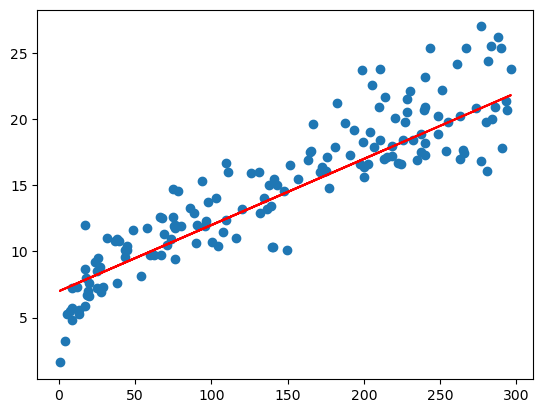

In [23]:
plt.scatter(x_train,y_train)
plt.plot(x_train, 6.99 + 0.05 * x_train,'r')
plt.show();

In [24]:
# prediction of testand training set result
y_pred_slr = slr.predict(x_test)
#x_pred_slr = slr.predict(x_train)

In [25]:
print("prediction for test set: {}".format(y_pred_slr))

prediction for test set: [ 7.41755568 19.88345888 14.31059417 18.77429648 20.07282807 18.18454672
 14.5270161  17.68677628 18.70395936 18.72560155 13.33669548 19.41274118
 10.03626104 17.15654255 11.713531   12.09226938 15.09512366 16.20428606
 15.84177932 13.1040419  18.61198003 13.99678237 17.56774422 16.57220334
 16.99963665 18.91497074 18.887918   11.06967576 16.99963665 13.65591783
 10.69634793 10.72881122 13.54229631 17.18900584  9.70080705 13.51524357
 12.25458583 16.10689619 19.02859225 17.44871216]


In [26]:
# actual value and the predicted value
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
slr_diff 

,Actual value,Predicted value
126,6.6,7.417556
104,20.7,19.883459
99,17.2,14.310594
92,19.4,18.774296
111,21.8,20.072828
167,17.2,18.184547
116,12.2,14.527016
96,16.7,17.686776
52,22.6,18.703959
69,22.3,18.725602


In [27]:
#Predict for any value
slr.predict([[56]])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([10.02543994])

In [28]:
from sklearn.metrics import r2_score
y_test_pred = slr.predict(x_test)

y_train_pred = slr.predict(x_train)
a = r2_score(y_train,y_train_pred)
b = r2_score(y_test,y_test_pred)
print('Training = {} testing = {}'.format(a,b))

Training = 0.8216142794949134 testing = 0.7281352744078883


Conclusion : 82.16% of the data fir the regression model

There is never 100% training or 100% testing

In [29]:
# 0 means the model is perfect. therefore the value should be as close to 0 as possible

In [30]:
meanAbErr = metrics.mean_absolute_error(y_test,y_test_pred)
meanSqerr = metrics.mean_squared_error(y_test,y_test_pred)
rootMeanSqErr = np.sqrt(meanSqerr)
print('Mean Absolute Error:',meanAbErr)
print('mean Squared Error:',meanSqerr)
print('Root Mean Squared Error:',rootMeanSqErr)

Mean Absolute Error: 1.905152391298234
mean Squared Error: 5.34850349246385
Root Mean Squared Error: 2.312683180304611


# Multiple Linear Regression

In [31]:
# setting the x and y value
x = sales[['TV','Radio','Newspaper']]
y = sales['Sales']

In [32]:
#Step 2: bifurcation of data into train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=100)

In [33]:
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [34]:
# Printing the model coefficients
print('Intercept:',mlr.intercept_)
print('Coefficient:',mlr.coef_)

Intercept: 4.419176628968954
Coefficient: [0.05373662 0.1061416  0.00542157]


In [35]:
y_pred_mlr = mlr.predict(x_test)

In [36]:
y_pred_mlr

array([ 9.24156185, 20.88863168, 16.35932288, 19.99325582, 21.56647985,
       16.18902526, 13.55593173, 15.44101643, 20.68858089, 20.87635961,
       12.30666696, 20.5823859 ,  8.2052026 , 16.8020073 , 10.49789975,
       10.04517517, 16.27471961, 14.58389375, 17.15124514, 12.54217786,
       18.5255145 , 12.14739801, 20.26906823, 17.68550321, 16.70332653,
       21.47564231, 20.03074293, 10.79641986, 19.02391131, 14.77388184,
       13.01107071,  9.11899998, 12.07692797, 16.60311172,  8.43700724,
       13.99646169,  9.96423595, 14.29142558, 16.80210584, 17.11029489])

In [37]:
print('Intercept:',mlr.intercept_)
print('Coefficient:',mlr.coef_)

Intercept: 4.419176628968954
Coefficient: [0.05373662 0.1061416  0.00542157]


In [38]:
# predict for any value
mlr.predict([[56,55,67]])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.6294606])

In [39]:
from sklearn.metrics import r2_score
y_test_pred = mlr.predict(x_test)

y_train_pred = mlr.predict(x_train)
a = r2_score(y_train,y_train_pred)
b = r2_score(y_test,y_test_pred)
print('Training = {} testing = {}'.format(a,b))

Training = 0.9114914479108845 testing = 0.8296690596780839


# Standardization

In [40]:
# setting the x and y value
x = sales[['TV','Radio','Newspaper']]
y = sales['Sales']

In [41]:
from sklearn.preprocessing import StandardScaler
# define min max scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(x)

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled,y,test_size=0.2,random_state=42)

In [52]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
Reg_predict=reg.predict(X_test)
reg_train_pred = reg.predict(X_train)
print("R score",metrics.r2_score(y_train,reg_train_pred))

R score 0.9001416005862131


In [53]:
from sklearn import metrics
print("R score",metrics.r2_score(y_test,Reg_predict))
print("MSE = ", metrics.mean_squared_error(y_test,Reg_predict))

R score 0.9059011844150826
MSE =  2.907756910271092


# L1 Lasso (L1 Regularized) Regression Model

In [54]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso()
lasso_reg.fit(X_train, y_train)

Lasso()

In [55]:
lasso_reg.score(X_test,y_test)

0.8206482018986152

In [56]:
lasso_reg.score(X_train,y_train)

0.8275781786615899

# Using Ridge (L2 Regularized) Regression Model

In [57]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [58]:
ridge_reg.score(X_test, y_test)

0.8481929801935719

In [59]:
ridge_reg.score(X_train,y_train)

0.8492031910767446

## Using Ridge Regression we have got 84.92 score for training and 84.81 score for testing